In [6]:
#get dependencies
import tensorflow as tf
import matplotlib as plt
import numpy
import os
from tensorflow import keras
from keras import layers
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator



tf.__version__

'2.18.0'

Found 19 files belonging to 2 classes.


Using 16 files for training.
Found 19 files belonging to 2 classes.
Using 3 files for validation.
['class_A', 'class_B']


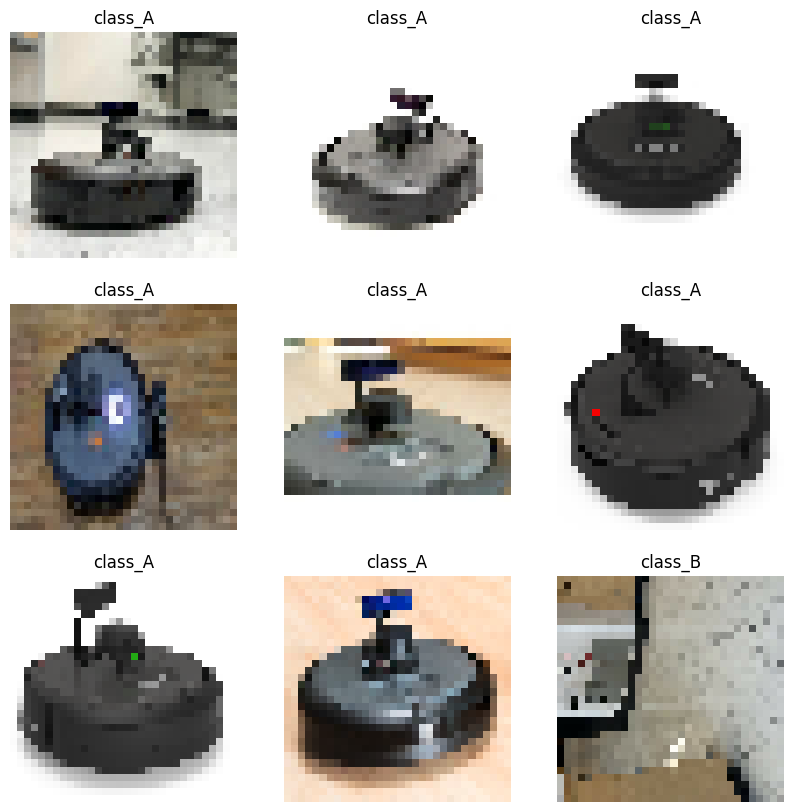

In [10]:
img_height = 32
img_width = 32

dataset_dir = "training"

# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])


ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    'training', label_mode = 'int',
    class_names = ["class_A", "class_B"],
    color_mode = 'rgb',
    batch_size = 9,
    image_size = (img_height, img_width),
    shuffle = True,
    seed = 123,
    validation_split = .2,
    subset = "training"
)

ds_val = tf.keras.preprocessing.image_dataset_from_directory(
    'training', label_mode = 'int',
    class_names = ["class_A", "class_B"],
    color_mode = 'rgb',
    batch_size = 9,
    validation_split = .2,
    image_size = (img_height, img_width),
    shuffle = True,
    seed = 123,
    subset = "validation"
)

#data augmentation function
data_augmentation = tf.keras.Sequential([
	tf.keras.layers.Rescaling(scale=1.0 / 255),
	tf.keras.layers.RandomFlip("horizontal_and_vertical"),
	tf.keras.layers.RandomZoom(
		height_factor=(-0.05, -0.15),
		width_factor=(-0.05, -0.15)),
	tf.keras.layers.RandomRotation(0.3)
])



class_names = ds_train.class_names
print(class_names)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    





(9, 32, 32, 3)
[0 0 0 0 0 0 0 1 0]


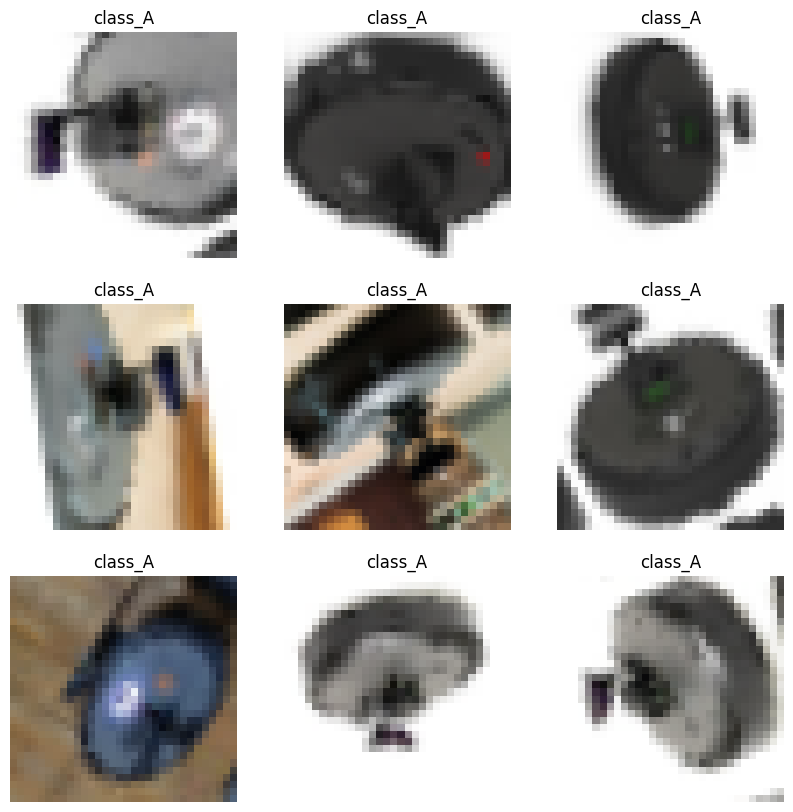

In [19]:
# Define your class names
class_names = ["class_A", "class_B"]

# Apply data augmentation to the training dataset
ds_train_augmented = ds_train.map(
    lambda x, y: (data_augmentation(x, training=True), y),
    num_parallel_calls=tf.data.AUTOTUNE
)

# Prefetch for performance optimization
ds_train_augmented = ds_train_augmented.prefetch(buffer_size=tf.data.AUTOTUNE)


for images, labels in ds_train_augmented.take(1):
    print(images.shape)  # Check shape of the images
    print(labels.numpy())  # Check the labels


# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in ds_train_augmented.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())  # Remove the type casting
        plt.title(class_names[labels[i].numpy()])  # Ensure labels are accessed correctly
        plt.axis("off")
